In [3]:
import os

import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np

from proximal_sti.lib.QsmEvaluationToolkit import qsm_psnr, qsm_ssim


oj = os.path.join

In [4]:
data_root = '/cis/home/sorenst3/my_documents/unsup_moi/data'
save_dir = '/cis/home/sorenst3/my_documents/unsup_moi/save_dir'

val_set = [3,6]
test_set = np.arange(101,113)

In [39]:
pinv_val_psnr = 37.53
pinv_test_psnr = 37.42

pinv_val_ssim = 0.9809
pinv_test_ssim = 0.9860

In [6]:
train1 = ['1', '2', '4', '5', '8', '9']
train2 = ['18', '14', '89', '25', '59', '24']
train3 = ['145', '259', '258', '189', '124', '489']
train4 = ['1245', '2458', '1289', '1459', '2589', '1489']
train5 = ['12459', '12489', '12458', '24589', '14589', '12589']
train6 = ['124589']

In [27]:
def get_results(train_set, eval_set, exp):

    assert exp == 'lpcnn' or exp == 'proximo'

    g_proximo = ['056', '062', '068', '074']

    res_psnr, res_ssim = {}, {}

    for train in train_set:
        psnrs, ssims = [], []

        # get names
        if exp == 'lpcnn':
            if train == '1':
                exp_name = 'lpcnn_attempt1'
            elif train == '124589':
                exp_name = 'lpcnn_attempt_all'
            else:
                exp_name = f'lpcnn_reg{train}'
        else:
            if len(train) == 1:
                exp_name = f'moi_semi{train}_sel36_old' 
            elif len(train) == 6:
                exp_name = f'moi_semi_all_g08'
            else:
                exp_name = f'moi_semi{train}_g{g_proximo[len(train) - 2]}'
        
        for sub in eval_set:
            mask_path = oj(data_root, 'Sub{0:04d}'.format(sub), 'cosmos', 'Sub{0:04d}_mask.nii.gz'.format(sub))
            mask = nib.load(mask_path).get_fdata()

            cosmos_path = oj(data_root, 'Sub{0:04d}'.format(sub), 'cosmos', 'Sub{0:04d}_cosmos.nii.gz'.format(sub))
            cosmos = nib.load(cosmos_path).get_fdata()
            cosmos *= mask

            all_oris = os.listdir(oj(data_root, 'Sub{0:04d}'.format(sub)))
            oris = [int(ori[3:]) for ori in all_oris if ori.startswith('ori')]        
            for ori in oris:
                xhat_path = oj(save_dir, exp_name, f'test_sub{sub}_ori{ori}_xhat.nii.gz')
                xhat = nib.load(xhat_path).get_fdata()
                xhat *= mask
                psnr = np.round(qsm_psnr(cosmos, xhat, mask, subtract_mean=False), decimals=2)
                ssim = np.round(qsm_ssim(cosmos, xhat), decimals=4)
                psnrs.append(psnr)
                ssims.append(ssim)
            
        res_psnr[train] = np.mean(psnrs)
        res_ssim[train] = np.mean(ssims)
    return res_psnr, res_ssim


In [16]:
# LPCNN PSNR - averaged over 6 iters - tested on 3, 6

sub1 = get_results(train_set=train1, eval_set=val_set, exp='lpcnn')
sub2 = get_results(train_set=train2, eval_set=val_set, exp='lpcnn')
sub3 = get_results(train_set=train3, eval_set=val_set, exp='lpcnn')
sub4 = get_results(train_set=train4, eval_set=val_set, exp='lpcnn')
sub5 = get_results(train_set=train5, eval_set=val_set, exp='lpcnn')
sub6 = get_results(train_set=train6, eval_set=val_set, exp='lpcnn')

lpcnn_val_psnr = [np.mean(list(sub1[0].values())), np.mean(list(sub2[0].values())), np.mean(list(sub3[0].values())), 
                np.mean(list(sub4[0].values())), np.mean(list(sub5[0].values())), np.mean(list(sub6[0].values()))]

lpcnn_val_ssim = [np.mean(list(sub1[1].values())), np.mean(list(sub2[1].values())), np.mean(list(sub3[1].values())), 
                np.mean(list(sub4[1].values())), np.mean(list(sub5[1].values())), np.mean(list(sub6[1].values()))]


print(lpcnn_val_psnr, lpccn_val_ssim)


[38.9, 39.11648148148148, 39.28962962962962, 39.33870370370371, 39.37592592592592, 39.458888888888886]


In [17]:
# LPCNN SSIM - averaged over 6 iters - tested on 3, 6

sub1 = get_results(train_set=train1, eval_set=val_set, exp='lpcnn', metric='ssim')
sub2 = get_results(train_set=train2, eval_set=val_set, exp='lpcnn', metric='ssim')
sub3 = get_results(train_set=train3, eval_set=val_set, exp='lpcnn', metric='ssim')
sub4 = get_results(train_set=train4, eval_set=val_set, exp='lpcnn', metric='ssim')
sub5 = get_results(train_set=train5, eval_set=val_set, exp='lpcnn', metric='ssim')
sub6 = get_results(train_set=train6, eval_set=val_set, exp='lpcnn', metric='ssim')

lpcnn_val_ssim = [np.mean(list(sub1.values())), np.mean(list(sub2.values())), np.mean(list(sub3.values())), 
                np.mean(list(sub4.values())), np.mean(list(sub5.values())), np.mean(list(sub6.values()))]

print(lpcnn_val_ssim)


/cis/home/sorenst3/my_documents/unsup_moi/proximal_sti/lib/QsmEvaluationToolkit.py:42: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_value = ssim(new_gt, new_input, multichannel=True, data_range=1, gaussian_weights=True, sigma=1.5, use_sample_covariance=False)


[0.9874092592592594, 0.9879851851851852, 0.9883259259259259, 0.9884240740740741, 0.9884444444444446, 0.988688888888889]


In [18]:
# LPCNN PSNR - averaged over 6 iters - tested on ds2

sub1 = get_results(train_set=train1, eval_set=test_set, exp='lpcnn')
sub2 = get_results(train_set=train2, eval_set=test_set, exp='lpcnn')
sub3 = get_results(train_set=train3, eval_set=test_set, exp='lpcnn')
sub4 = get_results(train_set=train4, eval_set=test_set, exp='lpcnn')
sub5 = get_results(train_set=train5, eval_set=test_set, exp='lpcnn')
sub6 = get_results(train_set=train6, eval_set=test_set, exp='lpcnn')

lpcnn_test_psnr = [np.mean(list(sub1[0].values())), np.mean(list(sub2[0].values())), np.mean(list(sub3[0].values())), 
                np.mean(list(sub4[0].values())), np.mean(list(sub5[0].values())), np.mean(list(sub6[0].values()))]

lpcnn_test_ssim = [np.mean(list(sub1[1].values())), np.mean(list(sub2[1].values())), np.mean(list(sub3[1].values())), 
                np.mean(list(sub4[1].values())), np.mean(list(sub5[1].values())), np.mean(list(sub6[1].values()))]

print(lpcnn_test_psnr, lpcnn_test_ssim)

[38.419155844155846, 38.59333333333334, 38.71627705627706, 38.74151515151515, 38.78848484848485, 38.83701298701299]


In [19]:
# LPCNN SSIM - averaged over 6 iters - tested on ds2

sub1 = get_results(train_set=train1, eval_set=test_set, exp='lpcnn', metric='ssim')
sub2 = get_results(train_set=train2, eval_set=test_set, exp='lpcnn', metric='ssim')
sub3 = get_results(train_set=train3, eval_set=test_set, exp='lpcnn', metric='ssim')
sub4 = get_results(train_set=train4, eval_set=test_set, exp='lpcnn', metric='ssim')
sub5 = get_results(train_set=train5, eval_set=test_set, exp='lpcnn', metric='ssim')
sub6 = get_results(train_set=train6, eval_set=test_set, exp='lpcnn', metric='ssim')

lpcnn_test_ssim = [np.mean(list(sub1.values())), np.mean(list(sub2.values())), np.mean(list(sub3.values())), 
                np.mean(list(sub4.values())), np.mean(list(sub5.values())), np.mean(list(sub6.values()))]

print(lpcnn_test_ssim)

[0.9909519480519481, 0.991357575757576, 0.9915188311688311, 0.9915859307359307, 0.9916246753246752, 0.9917558441558442]


In [28]:
# ProxiMO PSNR - averaged over 6 iters - tested on 3, 6

sub1 = get_results(train_set=train1, eval_set=val_set, exp='proximo')
sub2 = get_results(train_set=train2, eval_set=val_set, exp='proximo')
sub3 = get_results(train_set=train3, eval_set=val_set, exp='proximo')
sub4 = get_results(train_set=train4, eval_set=val_set, exp='proximo')
sub5 = get_results(train_set=train5, eval_set=val_set, exp='proximo')
sub6 = get_results(train_set=train6, eval_set=val_set, exp='proximo')

proximo_val_psnr = [np.mean(list(sub1[0].values())), np.mean(list(sub2[0].values())), np.mean(list(sub3[0].values())), 
                    np.mean(list(sub4[0].values())), np.mean(list(sub5[0].values())), np.mean(list(sub6[0].values()))]

proximo_val_ssim = [np.mean(list(sub1[1].values())), np.mean(list(sub2[1].values())), np.mean(list(sub3[1].values())), 
                    np.mean(list(sub4[1].values())), np.mean(list(sub5[1].values())), np.mean(list(sub6[1].values()))]

print(proximo_val_psnr, proximo_val_ssim)

[39.15259259259259, 39.25555555555555, 39.39185185185186, 39.42148148148148, 39.51444444444444, 39.47]


In [29]:
# ProxiMO SSIM - averaged over 6 iters - tested on 3, 6

sub1 = get_results(train_set=train1, eval_set=val_set, exp='proximo', metric='ssim')
sub2 = get_results(train_set=train2, eval_set=val_set, exp='proximo', metric='ssim')
sub3 = get_results(train_set=train3, eval_set=val_set, exp='proximo', metric='ssim')
sub4 = get_results(train_set=train4, eval_set=val_set, exp='proximo', metric='ssim')
sub5 = get_results(train_set=train5, eval_set=val_set, exp='proximo', metric='ssim')
sub6 = get_results(train_set=train6, eval_set=val_set, exp='proximo', metric='ssim')

proximo_val_ssim = [np.mean(list(sub1.values())), np.mean(list(sub2.values())), np.mean(list(sub3.values())), 
                    np.mean(list(sub4.values())), np.mean(list(sub5.values())), np.mean(list(sub6.values()))]

print(proximo_val_ssim)


/cis/home/sorenst3/my_documents/unsup_moi/proximal_sti/lib/QsmEvaluationToolkit.py:42: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_value = ssim(new_gt, new_input, multichannel=True, data_range=1, gaussian_weights=True, sigma=1.5, use_sample_covariance=False)


[0.9880129629629627, 0.9882185185185186, 0.988488888888889, 0.9885685185185186, 0.9887648148148148, 0.9886888888888888]


In [30]:
# ProxiMO PSNR - averaged over 6 iters - tested on ds2

sub1 = get_results(train_set=train1, eval_set=test_set, exp='proximo')
sub2 = get_results(train_set=train2, eval_set=test_set, exp='proximo')
sub3 = get_results(train_set=train3, eval_set=test_set, exp='proximo')
sub4 = get_results(train_set=train4, eval_set=test_set, exp='proximo')
sub5 = get_results(train_set=train5, eval_set=test_set, exp='proximo')
sub6 = get_results(train_set=train6, eval_set=test_set, exp='proximo')

proximo_test_psnr = [np.mean(list(sub1[0].values())), np.mean(list(sub2[0].values())), np.mean(list(sub3[0].values())), 
                    np.mean(list(sub4[0].values())), np.mean(list(sub5[0].values())), np.mean(list(sub6[0].values()))]

proximo_test_ssim = [np.mean(list(sub1[1].values())), np.mean(list(sub2[1].values())), np.mean(list(sub3[1].values())), 
                    np.mean(list(sub4[1].values())), np.mean(list(sub5[1].values())), np.mean(list(sub6[1].values()))]


print(proximo_test_psnr, proximo_test_ssim)

[38.654567099567096, 38.80487012987013, 38.88757575757575, 38.838311688311684, 38.90792207792208, 38.99285714285713]


In [31]:
# ProxiMO SSIM - averaged over 6 iters - tested on ds2

sub1 = get_results(train_set=train1, eval_set=test_set, exp='proximo', metric='ssim')
sub2 = get_results(train_set=train2, eval_set=test_set, exp='proximo', metric='ssim')
sub3 = get_results(train_set=train3, eval_set=test_set, exp='proximo', metric='ssim')
sub4 = get_results(train_set=train4, eval_set=test_set, exp='proximo', metric='ssim')
sub5 = get_results(train_set=train5, eval_set=test_set, exp='proximo', metric='ssim')
sub6 = get_results(train_set=train6, eval_set=test_set, exp='proximo', metric='ssim')

proximo_test_ssim = [np.mean(list(sub1.values())), np.mean(list(sub2.values())), np.mean(list(sub3.values())), 
                    np.mean(list(sub4.values())), np.mean(list(sub5.values())), np.mean(list(sub6.values()))]

print(proximo_test_ssim)

[0.991439826839827, 0.9916140692640693, 0.991752380952381, 0.9917235930735933, 0.99185, 0.9918376623376625]


In [34]:
data_root = '/cis/home/sorenst3/my_documents/unsup_moi/data'

def get_tkd_given_sub(sub, metric):

    assert metric == 'psnr' or metric == 'ssim'

    cosmos_path = oj(data_root, 'Sub{0:04d}'.format(sub), 'cosmos', 'Sub{0:04d}_cosmos.nii.gz'.format(sub))
    cosmos = nib.load(cosmos_path).get_fdata()
    
    mask_path = oj(data_root, 'Sub{0:04d}'.format(sub), 'cosmos', 'Sub{0:04d}_mask.nii.gz'.format(sub))
    mask = nib.load(mask_path).get_fdata()

    sub_dir = oj(data_root, 'Sub{0:04d}'.format(sub))
    oris = [int(d[3:]) for d in os.listdir(sub_dir) if d.startswith('ori')]
    tkd_paths = [oj(sub_dir, f'ori{ori}', 'Sub{0:04d}_ori{1}_tkd.nii.gz'.format(sub, ori)) for ori in oris]
    tkds = [nib.load(p).get_fdata() for p in tkd_paths]
    if metric == 'psnr':
        mets = [qsm_psnr(cosmos, tkd, mask, subtract_mean=False) for tkd in tkds]
    else:
        mets = [qsm_ssim(cosmos, tkd) for tkd in tkds]
    return np.mean(mets)

tkd_val_psnr = np.mean([get_tkd_given_sub(3, metric='psnr'), get_tkd_given_sub(6, metric='psnr')])
tkd_test_psnr = np.mean([get_tkd_given_sub(i, metric='psnr') for i in range(101, 113)])

tkd_val_ssim = np.mean([get_tkd_given_sub(3, metric='ssim'), get_tkd_given_sub(6, metric='ssim')])
tkd_test_ssim = np.mean([get_tkd_given_sub(i, metric='ssim') for i in range(101, 113)])

/cis/home/sorenst3/my_documents/unsup_moi/proximal_sti/lib/QsmEvaluationToolkit.py:42: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_value = ssim(new_gt, new_input, multichannel=True, data_range=1, gaussian_weights=True, sigma=1.5, use_sample_covariance=False)


In [44]:
proximo_val_full_psnr = np.zeros(len(proximo_val_psnr) + 1)
proximo_val_full_psnr[0] = 38.66
proximo_val_full_psnr[1:] = proximo_val_psnr

proximo_val_full_ssim = np.zeros(len(proximo_val_ssim) + 1)
proximo_val_full_ssim[0] = 0.9869
proximo_val_full_ssim[1:] = proximo_val_ssim

proximo_test_full_psnr = np.zeros(len(proximo_test_psnr) + 1)
proximo_test_full_psnr[0] = 38.22
proximo_test_full_psnr[1:] = proximo_test_psnr

proximo_test_full_ssim = np.zeros(len(proximo_test_ssim) + 1)
proximo_test_full_ssim[0] = 0.9907
proximo_test_full_ssim[1:] = proximo_test_ssim

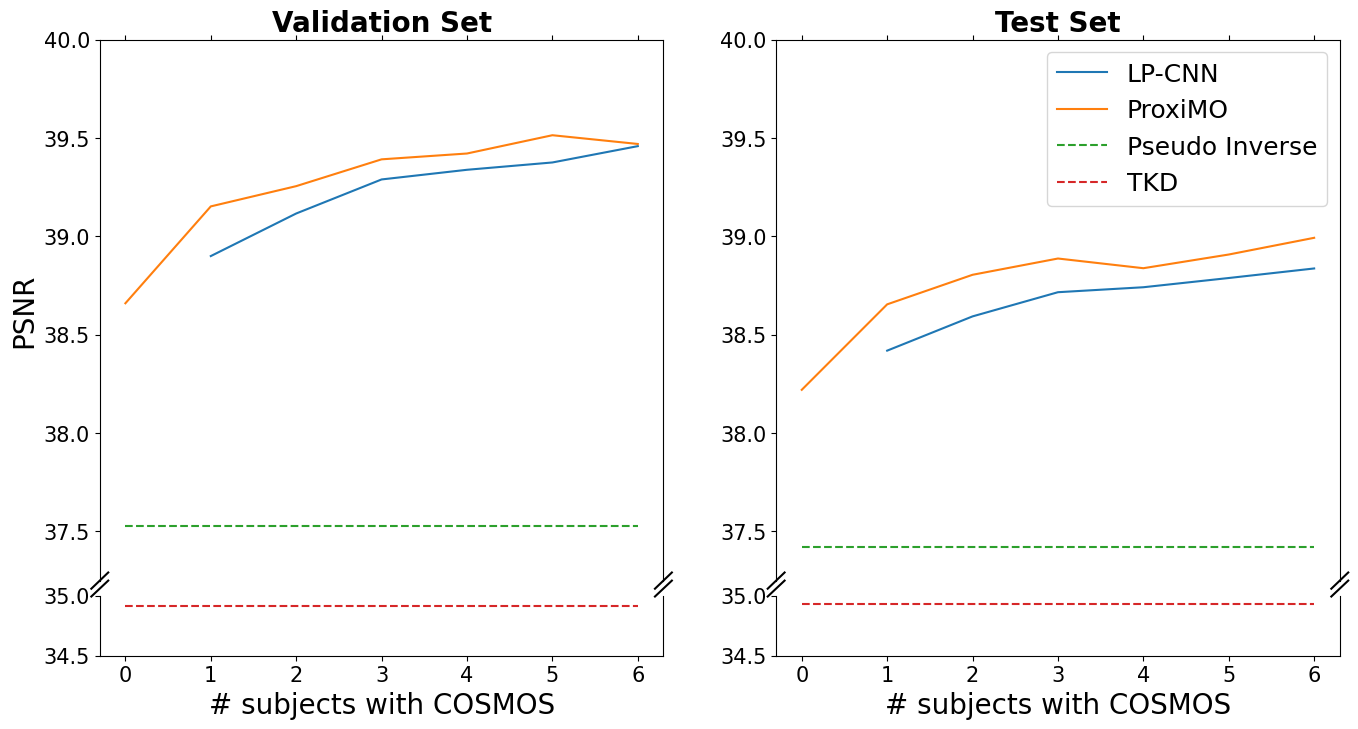

In [45]:
fig, ax = plt.subplots(2, 2, figsize=(16,8), gridspec_kw={'height_ratios': [9, 1]})

ax[0, 0].plot(np.arange(1, 7), lpcnn_val_psnr, label='LP-CNN', color='#1f77b4')
ax[0, 0].plot(np.arange(0, 7), proximo_val_full_psnr, label='ProxiMO', color='#ff7f0e')
ax[1, 0].set_xlabel('# subjects with COSMOS', size=20)
ax[0, 0].set_ylabel('PSNR', size=20)

ax[0, 0].plot(np.arange(0, 7), np.ones(7) * pinv_val_psnr, label='Pseudo Inverse', color='#2ca02c', linestyle='--')
ax[1, 0].plot(np.arange(0, 7), np.ones(7) * tkd_val_psnr, label='TKD', color='#d62728', linestyle='--')
ax[0, 0].set_title('Validation Set', weight='bold', size=20)
# ax[0, 0].legend()

ax[0, 0].set_ylim(37.25, 40)
ax[1, 0].set_ylim(34.5, 35)

ax[0, 0].spines['bottom'].set_visible(False)
ax[1, 0].spines['top'].set_visible(False)
ax[0, 0].xaxis.tick_top()
ax[0, 0].tick_params(labeltop=False)  # don't put tick labels at the top
ax[1, 0].xaxis.tick_bottom()

d = .015
kwargs = dict(transform=ax[0, 0].transAxes, color='k', clip_on=False)
ax[0, 0].plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax[0, 0].plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax[1, 0].transAxes)  # switch to the bottom axes
ax[1, 0].plot((-d, +d), (1 - d, 1.25), **kwargs)  # bottom-left diagonal
ax[1, 0].plot((1 - d, 1 + d), (1 - d, 1.25), **kwargs)  # bottom-right diagonal

ax[0, 0].tick_params(axis='both', labelsize=15)
ax[1, 0].tick_params(axis='both', labelsize=15)


# -----------------------------------------------------


ax[0, 1].plot(np.arange(1, 7), lpcnn_test_psnr, label='LP-CNN', color='#1f77b4')
ax[0, 1].plot(np.arange(0, 7), proximo_test_full_psnr, label='ProxiMO', color='#ff7f0e')
ax[1, 1].set_xlabel('# subjects with COSMOS', size=20)
ax[0, 1].plot(np.arange(0, 7), np.ones(7) * pinv_test_psnr, label='Pseudo Inverse', color='#2ca02c', linestyle='--')
ax[1, 1].plot([0], [38], label='TKD', color='#d62728', linestyle='--')
ax[1, 1].plot(np.arange(0, 7), np.ones(7) * tkd_test_psnr, label='TKD', color='#d62728', linestyle='--')
ax[0, 1].set_title('Test Set', weight='bold', size=20)

ax[0, 1].set_ylim(37.25, 40)
ax[1, 1].set_ylim(34.5, 35)
ax[1, 0].set_xticks(np.arange(7), fontsize=20)


ax[0, 1].plot([0], [38], label='TKD', color='#d62728', linestyle='--')
ax[0, 1].legend(fontsize=18)

ax[0, 1].spines['bottom'].set_visible(False)
ax[1, 1].spines['top'].set_visible(False)
ax[0, 1].xaxis.tick_top()
ax[0, 1].tick_params(labeltop=False)  # don't put tick labels at the top
ax[1, 1].xaxis.tick_bottom()

kwargs = dict(transform=ax[0, 1].transAxes, color='k', clip_on=False)
ax[0, 1].plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax[0, 1].plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax[1, 1].transAxes)  # switch to the bottom axes
ax[1, 1].plot((-d, +d), (1 - d, 1.25), **kwargs)  # bottom-left diagonal
ax[1, 1].plot((1 - d, 1 + d), (1 - d, 1.25), **kwargs)  # bottom-right diagonal

ax[0, 1].tick_params(axis='both', labelsize=15)
ax[1, 1].tick_params(axis='both', labelsize=15)


plt.subplots_adjust(hspace=0.05)
plt.savefig(oj(data_root, f'main_plot_psnr.pdf'), dpi=1000)

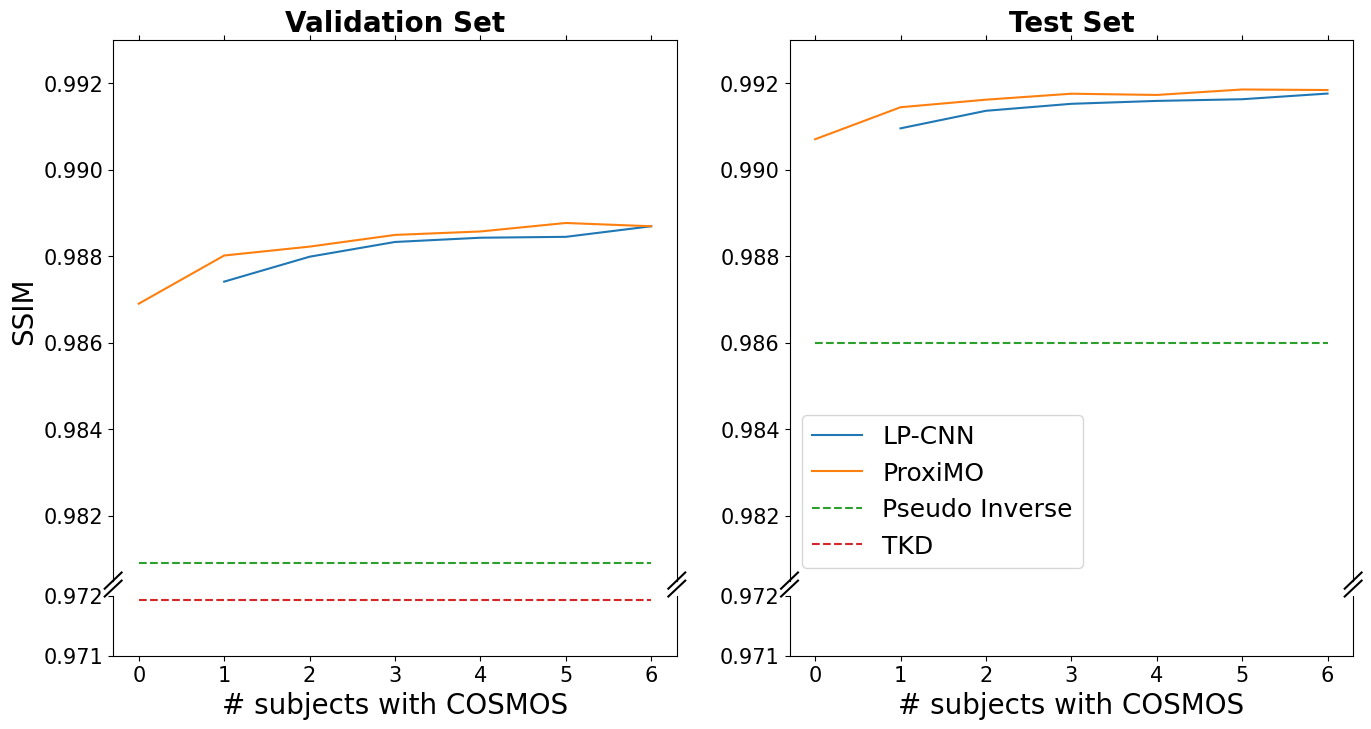

In [59]:
fig, ax = plt.subplots(2, 2, figsize=(16,8), gridspec_kw={'height_ratios': [9, 1]})

ax[0, 0].plot(np.arange(1, 7), lpcnn_val_ssim, label='LP-CNN', color='#1f77b4')
ax[0, 0].plot(np.arange(0, 7), proximo_val_full_ssim, label='ProxiMO', color='#ff7f0e')
ax[1, 0].set_xlabel('# subjects with COSMOS', size=20)
ax[0, 0].set_ylabel('SSIM', size=20)

ax[0, 0].plot(np.arange(0, 7), np.ones(7) * pinv_val_ssim, label='Pseudo Inverse', color='#2ca02c', linestyle='--')
ax[1, 0].plot(np.arange(0, 7), np.ones(7) * tkd_val_ssim, label='TKD', color='#d62728', linestyle='--')
ax[0, 0].set_title('Validation Set', weight='bold', size=20)
# ax[0, 0].legend()

ax[0, 0].set_ylim(0.9805, 0.993)
ax[1, 0].set_ylim(0.971, 0.972)

ax[0, 0].spines['bottom'].set_visible(False)
ax[1, 0].spines['top'].set_visible(False)
ax[0, 0].xaxis.tick_top()
ax[0, 0].tick_params(labeltop=False)  # don't put tick labels at the top
ax[1, 0].xaxis.tick_bottom()

d = .015
kwargs = dict(transform=ax[0, 0].transAxes, color='k', clip_on=False)
ax[0, 0].plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax[0, 0].plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax[1, 0].transAxes)  # switch to the bottom axes
ax[1, 0].plot((-d, +d), (1 - d, 1.25), **kwargs)  # bottom-left diagonal
ax[1, 0].plot((1 - d, 1 + d), (1 - d, 1.25), **kwargs)  # bottom-right diagonal

ax[0, 0].tick_params(axis='both', labelsize=15)
ax[1, 0].tick_params(axis='both', labelsize=15)


# -----------------------------------------------------


ax[0, 1].plot(np.arange(1, 7), lpcnn_test_ssim, label='LP-CNN', color='#1f77b4')
ax[0, 1].plot(np.arange(0, 7), proximo_test_full_ssim, label='ProxiMO', color='#ff7f0e')
ax[1, 1].set_xlabel('# subjects with COSMOS', size=20)
ax[0, 1].plot(np.arange(0, 7), np.ones(7) * pinv_test_ssim, label='Pseudo Inverse', color='#2ca02c', linestyle='--')
ax[1, 1].plot([0], [38], label='TKD', color='#d62728', linestyle='--')
ax[1, 1].plot(np.arange(0, 7), np.ones(7) * tkd_test_ssim, label='TKD', color='#d62728', linestyle='--')
ax[0, 1].set_title('Test Set', weight='bold', size=20)

ax[0, 1].set_ylim(0.9805, 0.993)
ax[1, 1].set_ylim(0.971, 0.972)
ax[1, 0].set_xticks(np.arange(7), fontsize=20)


ax[0, 1].plot([0], [38], label='TKD', color='#d62728', linestyle='--')
ax[0, 1].legend(fontsize=18)

ax[0, 1].spines['bottom'].set_visible(False)
ax[1, 1].spines['top'].set_visible(False)
ax[0, 1].xaxis.tick_top()
ax[0, 1].tick_params(labeltop=False)  # don't put tick labels at the top
ax[1, 1].xaxis.tick_bottom()

kwargs = dict(transform=ax[0, 1].transAxes, color='k', clip_on=False)
ax[0, 1].plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax[0, 1].plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax[1, 1].transAxes)  # switch to the bottom axes
ax[1, 1].plot((-d, +d), (1 - d, 1.25), **kwargs)  # bottom-left diagonal
ax[1, 1].plot((1 - d, 1 + d), (1 - d, 1.25), **kwargs)  # bottom-right diagonal

ax[0, 1].tick_params(axis='both', labelsize=15)
ax[1, 1].tick_params(axis='both', labelsize=15)


plt.subplots_adjust(hspace=0.05)
plt.savefig(oj(data_root, f'main_plot_ssim.pdf'), dpi=1000)

In [62]:
tkd_test_ssim

0.9817827948263168

In [3]:
# LPCNN SSIM - averaged over 6 iters - tested on ds2
sub1 = {'1': 0.9873 , '2': 0.9875, '4': 0.9870, '5': 0.9875, '8': 0.9873, '9': 0.9878}
sub2 = {'18': 0.9880, '14': 0.9876, '89': 0.9881, '25': 0.9881, '59': 0.9882, '24': 0.9878}
sub3 = {'145': 0.9881, '259': 0.9885, '258': 0.9883, '189': 0.9884, '124': 0.9882, '489': 0.9883}
sub4 = {'1245': 0.9885, '2458': 0.9883, '1289': 0.9885, '1459': 0.9883, '2589': 0.9886, '1489': 0.9883}
sub5 = {'12459': 0.9884, '12489': 0.9884, '12458': 0.9885, '24589': 0.9885, '14589': 0.9884, '12589': 0.9885}
sub6 = {'124589': 0.9887}

lpcnn_test = [np.mean(list(sub1.values())), np.mean(list(sub2.values())), np.mean(list(sub3.values())), 
              np.mean(list(sub4.values())), np.mean(list(sub5.values())), np.mean(list(sub6.values()))]

print(lpcnn_test)

[0.9874, 0.9879666666666668, 0.9882999999999998, 0.9884166666666666, 0.9884499999999999, 0.9887]


{'145': 39.391111111111115, '259': 39.43111111111111, '258': 39.40444444444445, '189': 39.39555555555555, '124': 39.324444444444445, '489': 39.40444444444445}
